This Jupyter Notebooks was written by Dr. Courtney Harrington (Colorado State University).
<p>It was adopted for Chem 151 at SCU by Dr. Grace Stokes (Spring 2021).

# Overview of Final Python Exercise for Chem 151

We've introduced the harmonic oscillator and rigid rotator as simplified models to describe the vibrational and rotational movements of diatomic molecules. In Part 1, we will look at the idealized spectra of diatomic molecules in light of the selection rules imposed by these model systems. In Part 2, we will use the equations generated from the rigid rotator to solve the Schrodinger equation for the Hydrogen Atom and graph the solutions (in 2D and 3D) using Python.

# Part 1a. The Rigid Rotator Energy Levels

As a reminder, the rotational energy levels of a rigid rotator are:

$$E_J = \frac{\hbar^2}{2I}J(J+1) \qquad J = 0,1,2...$$

$I$ refers to the moment of inertia, which is a function of bond length and the reduced mass for any diatomic. Note that this equation leads to unequal spacing of energy levels (a property unlike that of the vibrational energy levels for the Harmonic oscillator). In the following two cells we will first define a function called "define_figure" and then use this function to plot the energy levels for the Rigid Rotor. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax

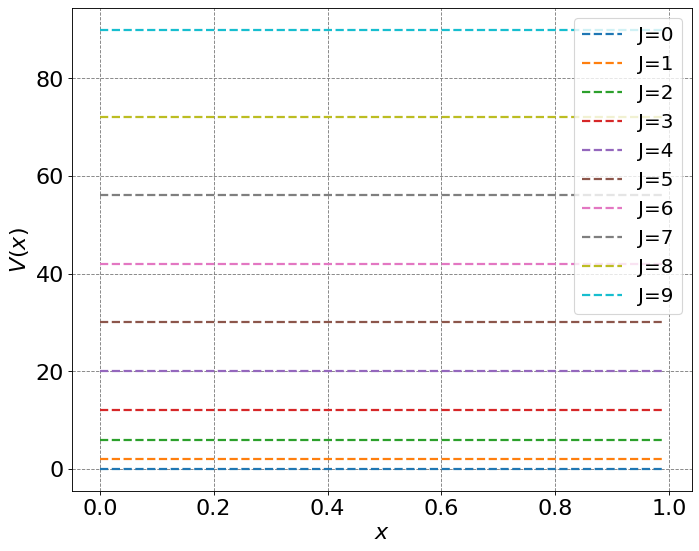

In [4]:
# plot rotational energy levels
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
I = 0.5
x = np.arange(0,1,0.01)
for j in range(10):
    # compute and plot energy levels
    energy = hbar**2/(2*I)*j*(j+1)
    label = "J=" + str(j)
    ax.plot(x, energy * np.ones(np.shape(x)),'--',lw=2,label=label)
plt.legend(fontsize=18)

### Post-class question 1: 
If you increase moment of inertia (by increasing bond length or reduced mass), how do the values for rotational energy levels change? Write your answer in a print statement in the blank code cell below.

# Part 1b. Rigid Rotor Selection Rules
The transitions between the various rotational energy levels are restricted by a selection rule which states $\Delta J = \pm1$. To derive this selection rule, we employed the recursion relationship of Legendre polynomials to evaluate $xP_j^{|m|}$, as described in detail in Section 6.7. As a reminder, the Harmonic Oscillator Selection Rules are described below.

The vibrational energy levels of the Harmonic oscillator are:

$$ E_{n} = \left(n +\frac{1}{2}\right)h\tilde{\nu} \qquad n = 0,1,2...$$

in which

$$ \tilde{\nu} = \frac{1}{2\pi c}\left(\frac{k}{\mu}\right)^{1/2} $$

Transitions between vibrational energy levels are governed by the selection rule, $\Delta n = \pm1$, which can be derived in the same way that it was done for the rigid rotator above.


# Coupling of a Harmonic Oscillator and Rigid Rotor

If the vibrational motion of a diatomic molecule is well described by the harmonic oscillator model and the rotational motion is well described by a rigid rotator, the vibrational-rotational spectrum should be well described by the combination of these two. That is, you'd expect the total rotational and vibrational enegy of the molecule to be the sum of the rotational and vibrational energies given above.

$$E_{n,J} = \left(n+\frac{1}{2}\right)h\tilde{\nu}+\tilde{B}J(J+1) \qquad n = 0,1,2... \qquad J = 0,1,2...$$

in which 

$$\tilde{B} = \frac{h}{8\pi^2cI}$$

Additionally, when a molecule that is described by this both models absorbs a photon, both selection rules apply:

$\Delta n = \pm 1$

$\Delta J = \pm 1$.

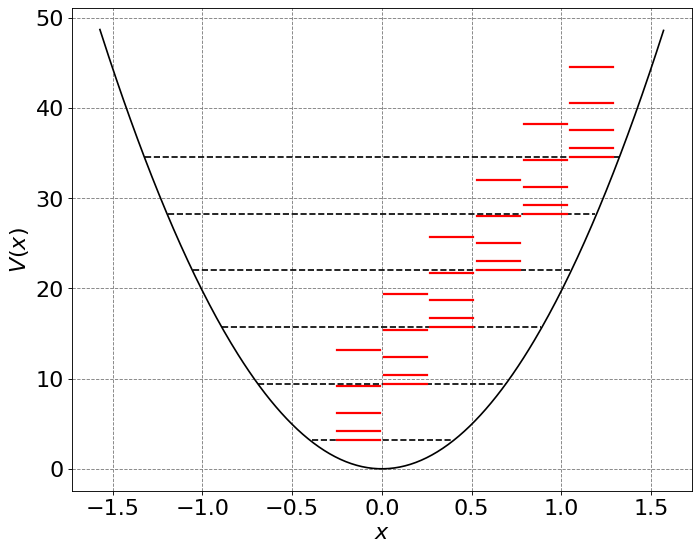

In [5]:
# let's plot the rotovibrational energy levels
from scipy.special import hermite
from scipy.special import factorial

# start by defining N function
def Nn(n,alpha):
    return 1/np.sqrt(2**n*factorial(n))*(alpha/np.pi)**0.25

# initialize a figure
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
omega = 2*np.pi
alpha = omega/np.pi
x = np.arange(-np.pi/2.0,np.pi/2.0,0.01)
x2 = np.power(x,2)
U = 0.5 * (omega)**2 * x**2
ax.plot(x, U, 'k')
xrot = np.arange(-0.25,0,0.01)
mu = 1
for n in range(6):
    # compute and plot energy levels
    evals = hbar*omega*(n+0.5)
    mask = np.where(evals > U)  
    ax.plot(x[mask], evals * np.ones(np.shape(x))[mask], 'k--')
    for j in range(5):
        # compute and plot energy levels
        energy = hbar**2/(2*mu)*j*(j+1) + evals
        ax.plot(xrot, energy * np.ones(np.shape(xrot)), 'r-',lw=2)
    xrot += 0.26

The above energy equation (and the associated Hamiltonian) assumes that the vibrational and rotational states are independent, although this isn't completely accurate. When a molecule absorbs infrared radiation, this causes a transition between vibrational levels, but that transition is also accompanied by a transition between rotational levels. Similarly, when a molecule absorbs high energy visible or ultraviolet light, a transition between electronic states is also accompanied by transitions between rotational and vibrational energy levels. 

In order to account for coupling between the rotational and vibrational levels, the Hamiltonian must be rewritten and a new Schrodinger equation solved. A simple approximation is to recognize that the bond length likely increases as vibrational quantum number increases, and therefore $\tilde{B}$ should really depend on the vibrational state of the molecule. We can rewrite the sum of the vibrational and rotational energies as:

$$E_{n,J} = \left(n+\frac{1}{2}\right)\tilde{\nu}  +  \tilde{B_n} J(J+1)$$

in which the notation, $B_n$, indicates that the rotational constant depends on the vibrational energy level $n$.  This dependence is called the rotation-vibration interaction, and it's expressed as:

$$ \tilde{B_n} = \tilde{B_e} - \tilde{\alpha_e}\left(n+\frac{1}{2}\right) $$

If we consider the $n=0\rightarrow1$ transition (for which $\Delta J = +1$), then the so called R branch of the rotational vibrational spectra is comprised of observable peaks dictated by:

$$\tilde{\nu_R}\left(\Delta J =+1\right) = E_{1,J+1} - E_{0,J}$$

$$ = \frac{3}{2}\tilde{\nu} + \tilde{B_1}\left(J+1\right)\left(J+2\right) - \frac{1}{2}\tilde{\nu} - \tilde{B_0} J\left(J+1\right)$$

$$ = \tilde{\nu} + 2\tilde{B_1}+\left(3\tilde{B_1}-\tilde{B_0}\right)J + \left(\tilde{B_1}-\tilde{B_0}\right)J^2 \quad J=0,1,2,...$$

Likewise, the P branch is given by: 

$$\tilde{\nu_P}\left(\Delta J = - 1\right) = E_{1,J-1} - E_{0,J}$$

$$ = \tilde{\nu} - \left(\tilde{B_1}+\tilde{B_0}\right)J + \left(\tilde{B_1}-\tilde{B_0}\right)J^2 \quad J=1,2,3,...$$

Additionally, not only do we need to correct the energy contribution of vibrational transitions due to a dependence on bond length, but we also need to correct the energy equation for rotational transitions, as diatomics do not have truly rigid bonds. In fact, as molecules rotate more energetically, the centrifugal force causes the bond to stretch. This can be observed in the uneven line spacing seen in the rotation-vibration spectra of diatomic molecules. From perturbation theory, we get the following correction factor:

$$ \tilde{\nu} = F\left(J+1\right)-F\left(J\right) $$

$$ = 2\tilde{B}\left(J+1\right)-4\tilde{D}\left(J+1\right)^3 \qquad J = 0,1,2...$$

in which $\tilde{D}$ is the centrifugal distortion constant.

## Vibrational and Rotational Spectra of the Hydrogen Halides

reduced mass of HBr (amu): 0.9952473087979751
reduced mass of HBr (Kg): 1.652647010713973e-27
2650.684176458127
8.46683304979384
2667.6178425577145
[2870.8218357527667, 2853.888169653179, 2836.954503553591, 2820.0208374540034, 2803.0871713544157, 2786.1535052548284, 2769.2198391552406, 2752.286173055653, 2735.352506956065, 2718.4188408564773, 2701.48517475689, 2684.5515086573023, 2667.6178425577145]
2633.750510358539
[2633.750510358539, 2616.8168442589513, 2599.8831781593635, 2582.949512059776, 2566.0158459601885, 2549.0821798606007, 2532.148513761013, 2515.214847661425, 2498.281181561838, 2481.34751546225, 2464.4138493626624]


(2400.0, 2900.0)

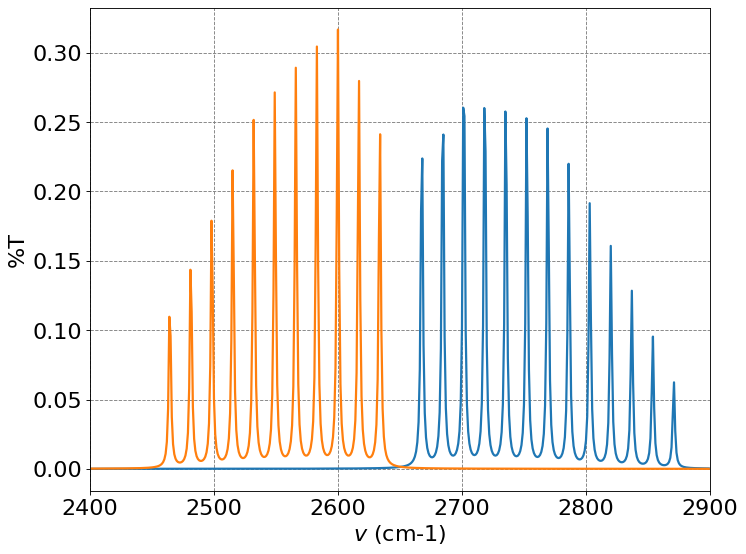

In [6]:
import numpy as np
from scipy.constants import h,hbar,c
import matplotlib.pyplot as plt

#HBr
def vtil(k,u):
    from scipy.constants import h,hbar,c
    return (((k/u)**0.5)/(2*np.pi*c)) #units of c = m/sec

k = 412 # units of N/m

u = ((79.904*1.0078)/(79.904+1.0078))
print("reduced mass of HBr (amu):",u)
u = u*(1.66053904e-27)#units of Kg
print("reduced mass of HBr (Kg):",u) # units of inverse meters

vtil_HBr = vtil(k,u)/100 #units of wavenumbers
print(vtil_HBr)

def Btil(u,Re):
    from scipy.constants import h,hbar,c
    return h/(8*(np.pi**2)*c*u*(Re**2))

Re = 141.44e-12 #units of meters

Btil_HBr = Btil(u,Re)/100 #units of wavenumbers
print(Btil_HBr)
    
# This is the beginning of code you will need to replace with new code
v0 = vtil_HBr +2*Btil_HBr*(1)
v1 = vtil_HBr +2*Btil_HBr*(1+1)
v2 = vtil_HBr +2*Btil_HBr*(2+1)
v3 = vtil_HBr +2*Btil_HBr*(3+1)
v4 = vtil_HBr +2*Btil_HBr*(4+1)
v5 = vtil_HBr +2*Btil_HBr*(5+1)
v6 = vtil_HBr +2*Btil_HBr*(6+1)
v7 = vtil_HBr +2*Btil_HBr*(7+1)
v8 = vtil_HBr +2*Btil_HBr*(8+1)
v9 = vtil_HBr +2*Btil_HBr*(9+1)
v10 = vtil_HBr +2*Btil_HBr*(10+1)
v11 = vtil_HBr +2*Btil_HBr*(11+1)
v12 = vtil_HBr +2*Btil_HBr*(12+1)
v = [v12,v11,v10,v9,v8,v7,v6,v5,v4,v3,v2,v1,v0]
print(v0)
print(v)

#P Branch

p1 = vtil_HBr -2*Btil_HBr*(1)
p2 = vtil_HBr -2*Btil_HBr*(2)
p3 = vtil_HBr -2*Btil_HBr*(3)
p4 = vtil_HBr -2*Btil_HBr*(4)
p5 = vtil_HBr -2*Btil_HBr*(5)
p6 = vtil_HBr -2*Btil_HBr*(6)
p7 = vtil_HBr -2*Btil_HBr*(7)
p8 = vtil_HBr -2*Btil_HBr*(8)
p9 = vtil_HBr -2*Btil_HBr*(9)
p10 = vtil_HBr -2*Btil_HBr*(10)
p11 = vtil_HBr -2*Btil_HBr*(11)

p = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11]
print(p1)
print(p)

def lorentzian(x,v,fwhm):
    return (2*np.pi)**(-1) * fwhm / ( (x-v)**2 + (0.5*fwhm)**2 )

x = np.arange(2400,2900,1)
fwhm = 2.0

ax = define_figure(xlabel="$v$ (cm-1)",ylabel="%T")
plt.plot(x,0.2*lorentzian(x,v12,fwhm)+0.3*lorentzian(x,v11,fwhm)+0.4*lorentzian(x,v10,fwhm)+0.5*lorentzian(x,v9,fwhm)+0.6*lorentzian(x,v8,fwhm)+0.7*lorentzian(x,v7,fwhm)+0.8*lorentzian(x,v6,fwhm)+0.85*lorentzian(x,v5,fwhm)+0.90*lorentzian(x,v4,fwhm)+0.95*lorentzian(x,v3,fwhm)+1*lorentzian(x,v2,fwhm)+0.9*lorentzian(x,v1,fwhm)+0.8*lorentzian(x,v0,fwhm),lw=2)
plt.plot(x,0.8*lorentzian(x,p1,fwhm)+0.9*lorentzian(x,p2,fwhm)+1*lorentzian(x,p3,fwhm)+0.95*lorentzian(x,p4,fwhm)+0.9*lorentzian(x,p5,fwhm)+0.85*lorentzian(x,p6,fwhm)+0.80*lorentzian(x,p7,fwhm)+0.7*lorentzian(x,p8,fwhm)+0.6*lorentzian(x,p9,fwhm)+0.5*lorentzian(x,p10,fwhm)+0.4*lorentzian(x,p11,fwhm),lw=2)
plt.xlim(2400,2900)

# Part 2. The Hydrogen Atom

A hydrogen atom is composed of an electron and a proton.  If these two particles behaved classically, their interaction energy would be described by the Coulombic attraction between the two particles:

$$V(r) = -\frac{e^2}{4\pi\epsilon_0r}$$

in which $r$ is the separation distance between the two particles, $e$ is the charge of an electron and $\epsilon_0$ is the permittivity of free space. 

In quantum mechanics, this Coulombic attraction also describes the potential energy of these particles. Therefore, in addition to the kinetic energy, the Hamiltonian for a hydrogen atom is:

$$\hat{H} = -\frac{\hbar^2}{2m_e}\nabla^2-\frac{e^2}{4\pi\epsilon_0r}$$

in which $m_e$ is the mass of an electron and $\nabla^2$ is the Laplacian in three dimensions.  Note that this Hamiltonian is only in terms of the coordinates of the electron relative to the heavy proton.  

Since the potential is a function of $r$, the separation distance between the proton and the electron, it is useful to write the Laplacian in spherical coordinates.

$$\nabla^2_{r\theta\phi} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial^2\phi}$$

Plugging this Hamiltonian into the Schrodinger equation yields:

$$\hat{H}\Psi(r,\theta,\phi) = -\frac{\hbar^2}{2m_e}\left[\frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right]\Psi(r,\theta,\phi) +V(r)\Psi(r,\theta,\phi) = E\Psi(r,\theta,\phi)$$ 

Note that this Schrodinger equation is time-independent, and because it's time-independent, this differential equation can be solved by using a technique called separation of variables, which yields two equation that can be independently solved for the radial wavefunctions, which describe the electron probability density of the atom, and angular wavefunctions, which describe the atomic orbitals of the atom. 

You can find the remainder of the derivation in chapter 6 of the textbook, but in short, you'll find that the radial wavefunctions and energies are
$$R_{nl} = -\left[ \frac{(n-l-1)!}{2n[(n+1)!]^3}\right]^{1/2} \left( \frac{2}{na_0}\right)^{l+3/2} r^le^{-r/na_0}L_{n+1}^{2l+1}\left( \frac{2r}{na_0}\right)$$

$$E_n = - \frac{m_ee^4}{8\epsilon_0^2h^2n^2} = - \frac{e^2}{8\pi\epsilon_0a_0n^2} \qquad n=1,2,... $$

in which $a_0 = \frac{\epsilon_0h^2}{\pi m_ee^2}$ is the Bohr radius and $L_{n+l}^{2l+1}$ are the associated Laguerre polynomials.  These are actually the same energies obtained from the Bohr model of the hydrogen atom.  Also notice that the energies are independent of $l$ and that $n\geq l+1 $ or $0 \leq l \leq n-1$ for $n=1,2,..$. 
Additionally, the angular solution is the same as that of the rigid rotator. Namely:

$$\hat{L}^2Y(\theta,\phi) = \hbar^2l(l+1)Y_l^{m_l}(\theta,\phi) \qquad l=0,1,2... \qquad -l\leq m_l \leq l $$

$Y_l^{m_l}(\theta,\phi)$ are called spherical harmonics. It is customary to write them in terms of $l$ and $m_l$ for the hydrogen atom (as opposed to $J$ and $m_J$, which is the notation used for the rigid rotator). The rigid rotator is a simple model used to describe a rotating diatomic molecule. The model is comprised of two masses, $m_1$ and $m_2$, which are located at a fixed distance from the center-of-mass of the molecule (hence the descriptor 'rigid'). No diatomic molecule is truly rigid because molecules also vibrate, but the rigid rotator suffices to give an approximation of the rotational energy levels for a diatomic.

The complete hydrogen atom wavefunctions are a product of the radial and angular components:

$$\psi_{nlm_l}(r,\theta,\phi) = R_{nl}(r)Y_l^{m_l}(\theta,\phi)$$

## Part 2a. Use Python to plot the radial portion, $R_{nl}(r)$, of the H atom wavefunctions.

## Post-lab question 2: 
Look at the output of the 3rd (bottommost plot) that results from running the code below. Notice that I forgot to label the legend. Based on the output from the two graphs immediately above the un-labeled graph and the plots shown in Figure 7.2 on page 329 of McQuarrie, label the correct principle quantum number ($n$) and angular quantum number ($l$) for each colored trace in the print statement below. 


In [ ]:
print('In the 3rd graph, the red trace corresponds to n = ... and l = ..., which is the xxx orbital')
print('In the 3rd graph, the purple trace corresponds to n = ... and l = ..., which is the xxx orbital')
print('In the 3rd graph, the brown trace corresponds to n = ... and l = ..., which is the xxx orbital')

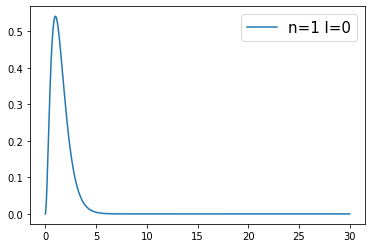

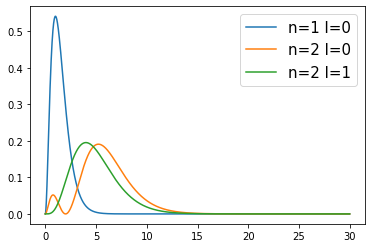

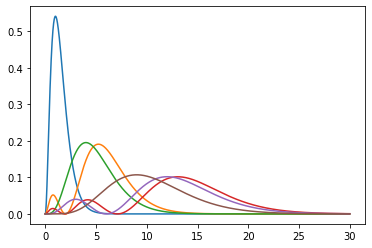

In [7]:
# let's plot some radial wavefunctions of the hydrogen atom
import numpy as np
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import factorial
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline


nLimit = 1
a0 = 1.0
r = np.arange(0,30,0.01)

for n in range(1,nLimit+1):
    for l in range(n):
        prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+1)**3))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
        R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
        norm = np.sqrt(integrate.simps(np.power(r,2)*np.power(R,2),r))
        R/=norm
        label = "n=" + str(n) + " l=" + str(l)
        plt.plot(r,np.power(R,2)*np.power(r,2),label=label)

plt.legend(fontsize=15)
plt.show()


nLimit = 2
a0 = 1.0
r = np.arange(0,30,0.01)

for n in range(1,nLimit+1):
    for l in range(n):
        prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+1)**3))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
        R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
        norm = np.sqrt(integrate.simps(np.power(r,2)*np.power(R,2),r))
        R/=norm
        label = "n=" + str(n) + " l=" + str(l)
        plt.plot(r,np.power(R,2)*np.power(r,2),label=label)

plt.legend(fontsize=15)
plt.show()


nLimit = 3
a0 = 1.0
r = np.arange(0,30,0.01)

for n in range(1,nLimit+1):
    for l in range(n):
        prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+1)**3))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
        R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
        norm = np.sqrt(integrate.simps(np.power(r,2)*np.power(R,2),r))
        R/=norm
        plt.plot(r,np.power(R,2)*np.power(r,2))

plt.show()

## Part 2b. Use Python to plot the first few spherical harmonics, $Y_l^{m}(\theta,\phi)$

(see equations in Table 7.1 on page 323 in McQuarrie)

After you hit "Shift-Enter" or PLAY in the cell below, it may take a minute or two to graph the 3D plot(s), depending on how many you make.

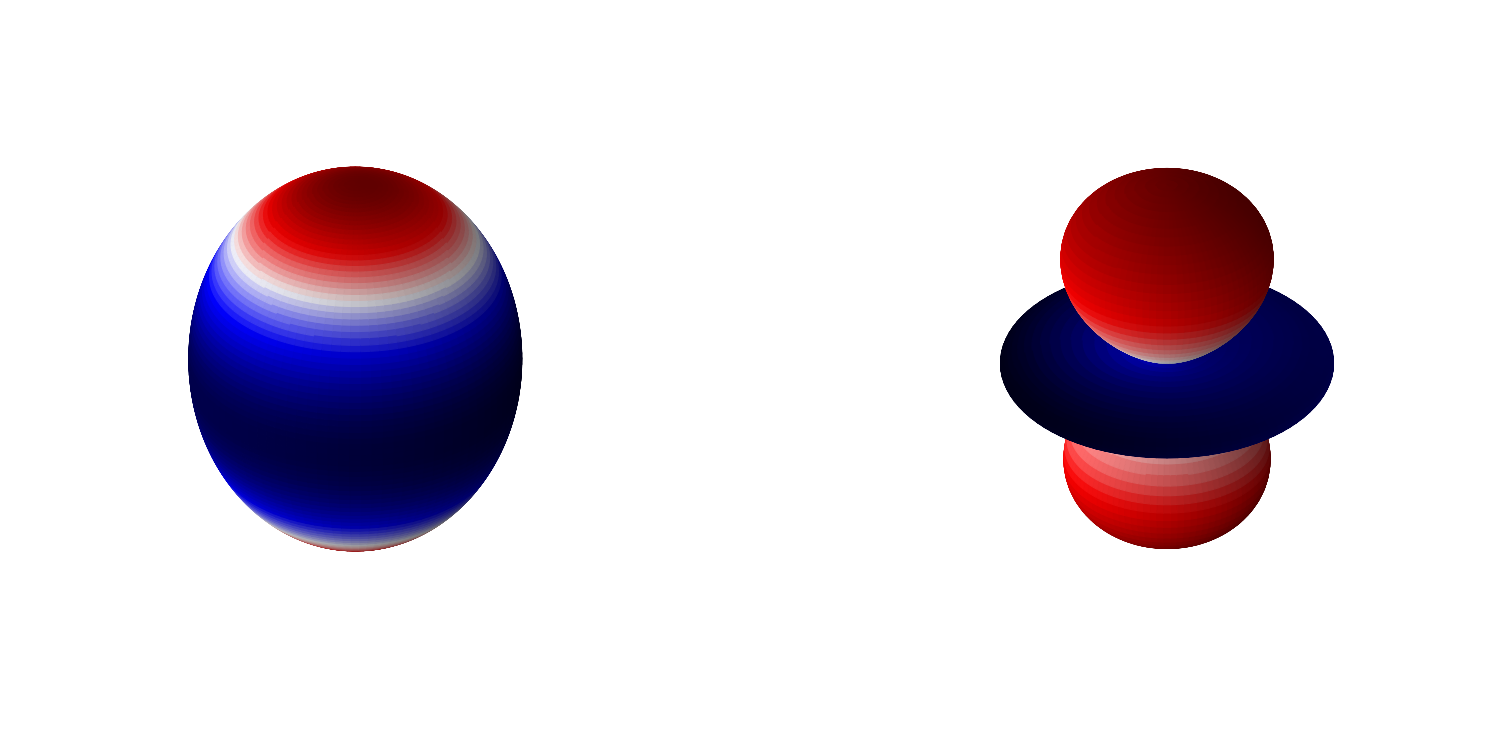

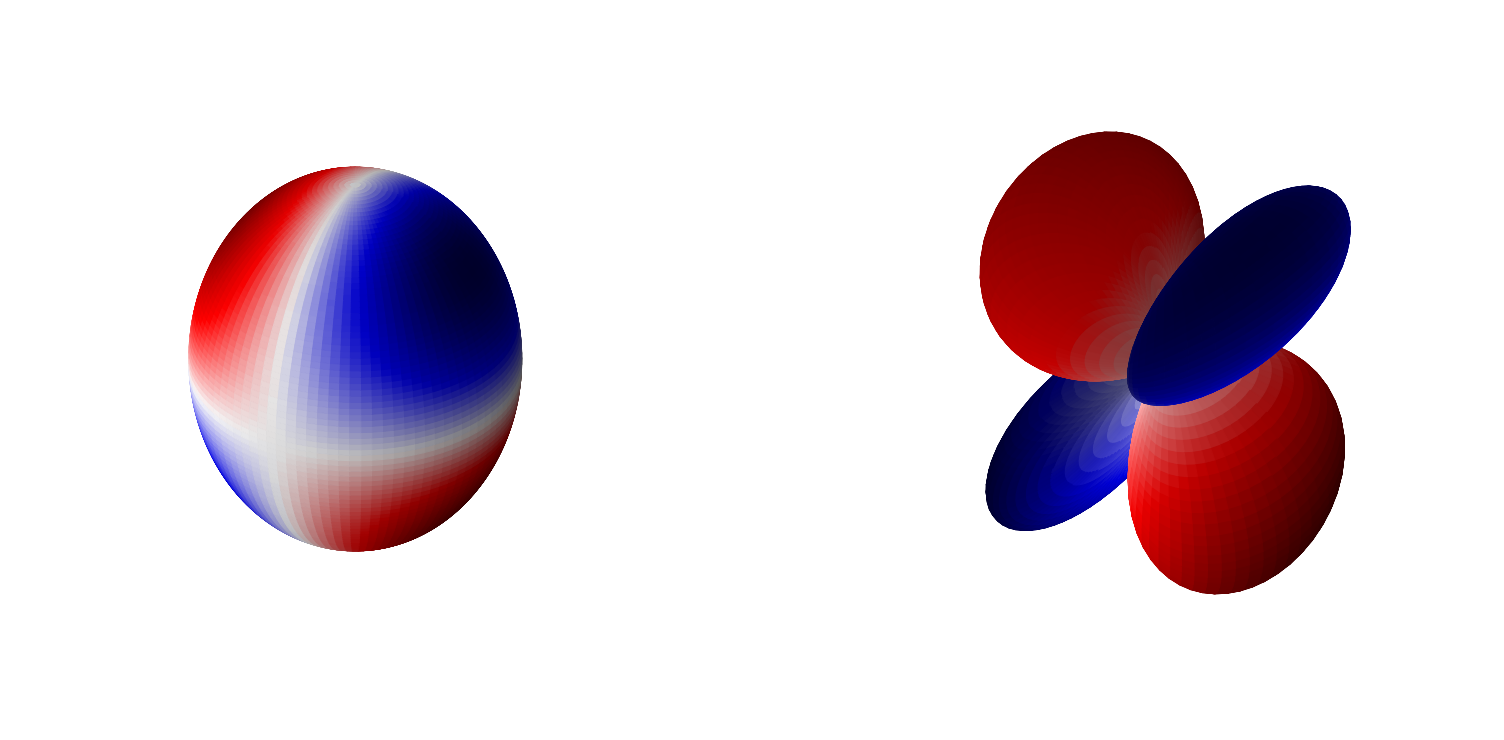

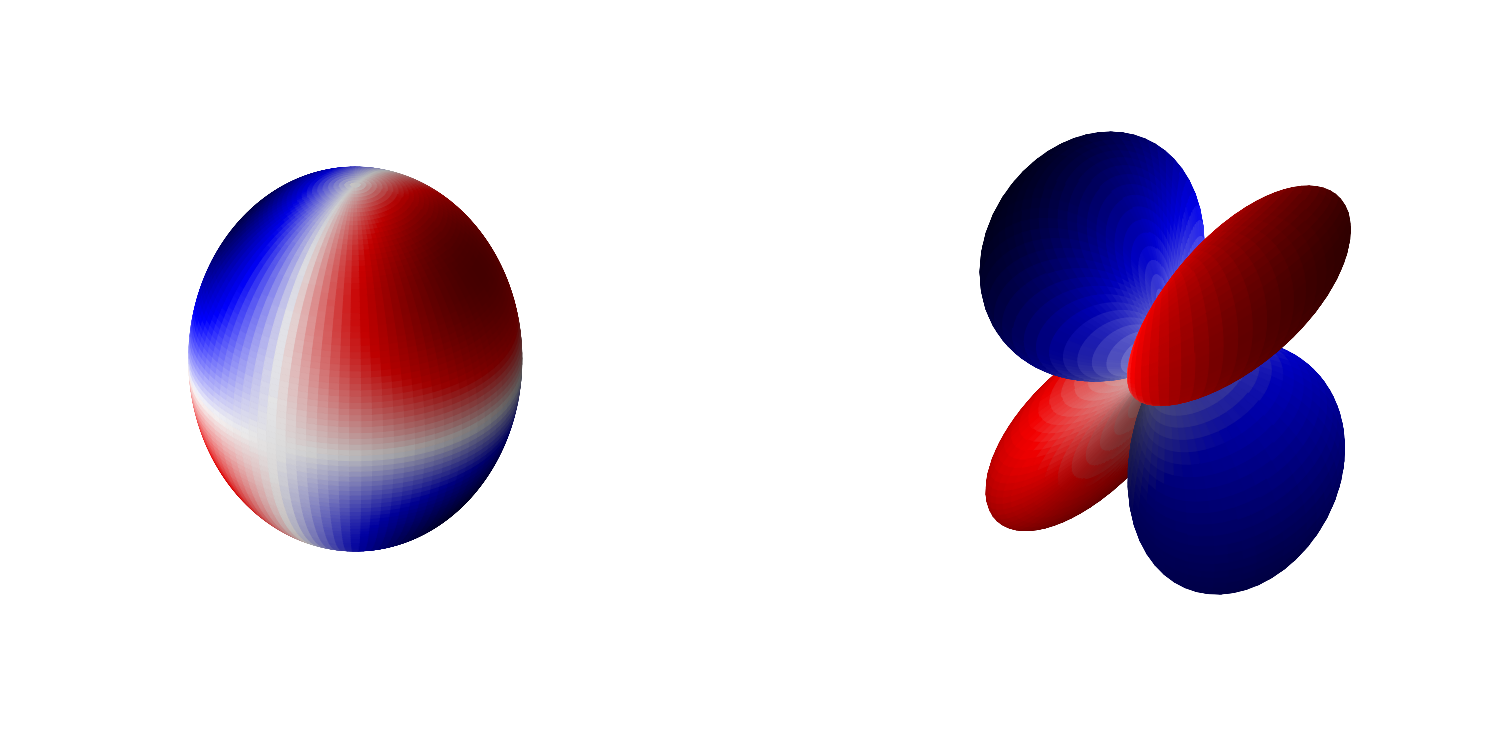

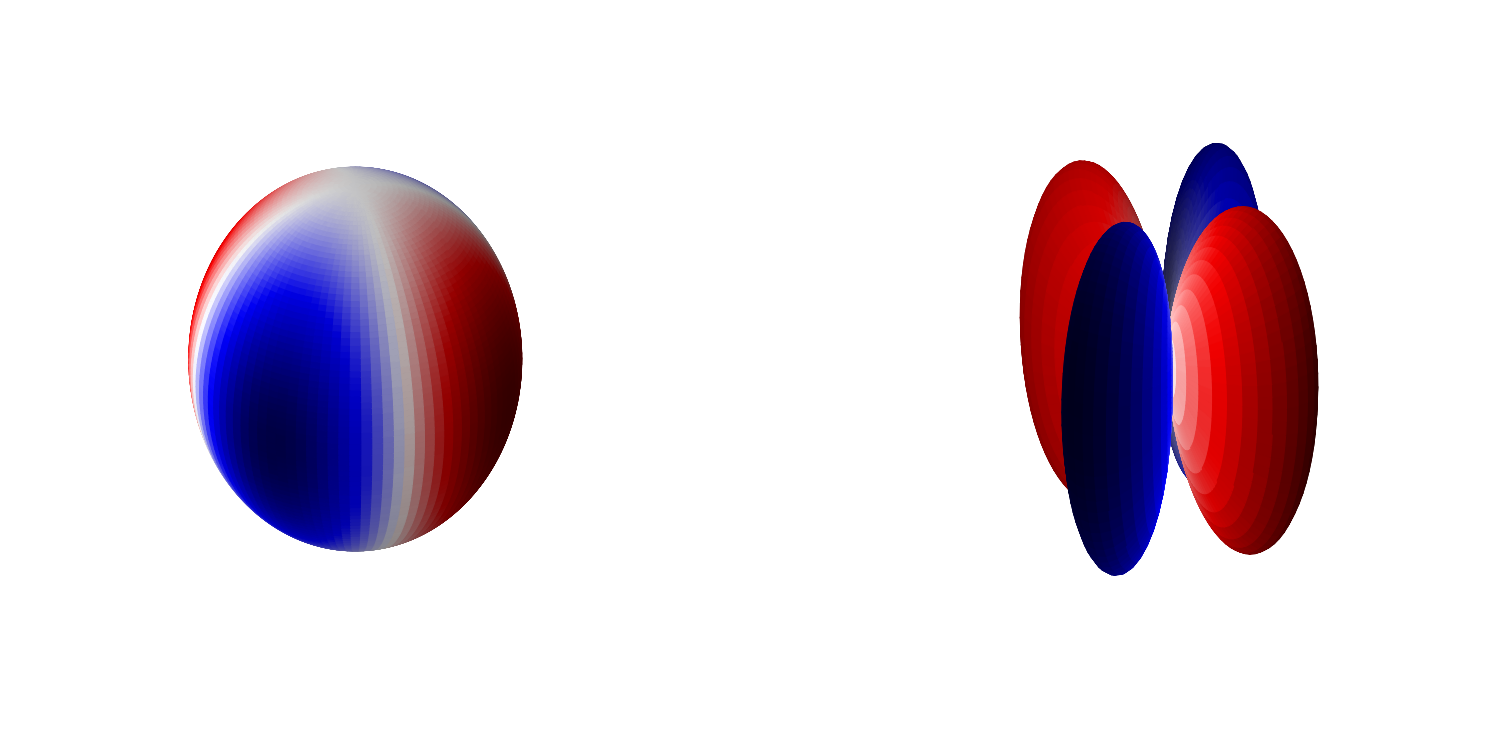

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import sph_harm


def plot_spherical_harmonic(m,l,theta=np.linspace(0,np.pi,100),phi=np.linspace(0,2*np.pi,100)):
    THETA, PHI = np.meshgrid(theta, phi)
    X = np.sin(THETA) * np.cos(PHI)
    Y = np.sin(THETA) * np.sin(PHI)
    Z = np.cos(THETA)
    # Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
    fcolors = sph_harm(m, l, PHI, THETA).real
    s = sph_harm(m, l, PHI, THETA).real
    s /= s.max()
    fmax, fmin = fcolors.max(), fcolors.min()
    fcolors = (fcolors - fmin)/(fmax - fmin)
    

    # Set the aspect ratio to 1 so our sphere looks spherical
    fig = plt.figure(figsize=(24,12),dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    ax.set_axis_off()
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(X*s, Y*s, Z*s,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    # Turn off the axis planes
    ax.set_axis_off()

plt.show()
plot_spherical_harmonic(0,2)
plot_spherical_harmonic(1,2)
plot_spherical_harmonic(-1,2)
plot_spherical_harmonic(2,2)

## Post-lab question 3. 
The code above allowed us to plot the spherical harmonics for $m = 0$ and $l = 2$.
Copy and paste the code in the empty cell below to plot a few of the other $l = 2$ orbitals shown in Figure 7.8 on page 339. You will need to change the $m$ values. Isn't this cool?!